In [472]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [400]:
### Q. Read the bank dataset 
data= pd.read_csv(r'C:\Users\kkbal\Downloads\Assignment Folder\bank.csv',sep=';')


In [27]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [370]:
### Data transformation
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [371]:
data['education']

0                basic.9y
1             high.school
2             high.school
3                basic.9y
4       university.degree
              ...        
4114             basic.6y
4115          high.school
4116          high.school
4117          high.school
4118          high.school
Name: education, Length: 4119, dtype: object

In [372]:
data['education']=data['education'].str.replace('basic.4y','Basic')
data['education']=data['education'].str.replace('basic.9y','Basic')
data['education']=data['education'].str.replace('basic.6y','Basic')


After grouping, this is the columns

In [373]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [375]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data exploration

C:\Users\kkbal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


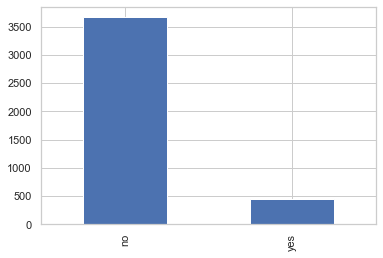

In [376]:
data['y'].value_counts().plot('bar')


There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [377]:
## Q. find the average of the remaining variables by different values of 'y'
data.groupby(['y']).mean()

## Q. Mention the key findings out of the previous split

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [378]:
### Find the mean of other variables by different values of 'job' variable
data.groupby(['job']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341


In [379]:
### Find the mean of other variables by different values of 'marital' variable
data.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091


In [380]:
### Find the mean of other variables by different values of 'education' variable
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479


In [ ]:
Visualizations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

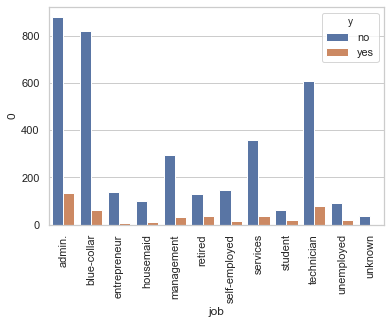

In [381]:
## Create a visualization as shown below for variable 'job' and frequency of purchase
a=data.groupby(['job']).y.value_counts().rename().reset_index()
sns.barplot(data=a,x='job',y=0,hue='y')
plt.xticks(rotation=90)

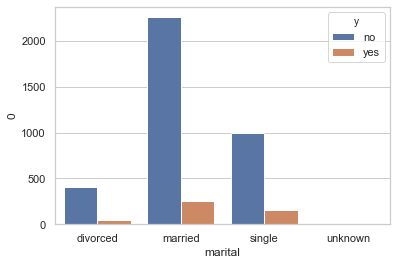

In [382]:
### Create a stacked bar chart between variables 'Marital Status','Purchase' and Proportion of Customers

z=data.groupby('marital').y.value_counts().rename().reset_index()
sns.barplot(data=z,x='marital',y=0,hue='y')

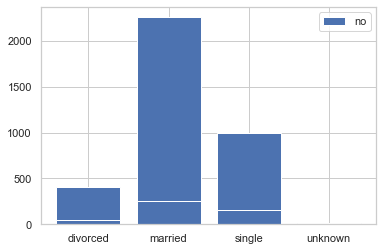

In [168]:
plt.bar(z['marital'],z[0])
plt.legend(z['y'])

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

Education seems a good predictor of the outcome variable.

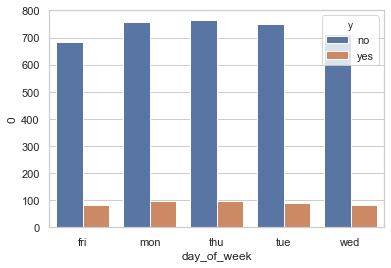

In [159]:
### Create a stacked bar chart between variables 'day_of_week' and Proportion of Customers grouped by variable 'y'
c=data.groupby(['day_of_week','y']).y.count().rename().reset_index()
sns.barplot(data=c,x='day_of_week',y=0,hue='y')

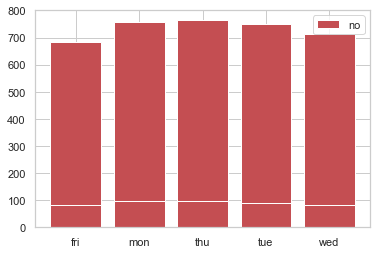

In [165]:
plt.bar(c['day_of_week'],c[0],color='r')
plt.legend(c['y'])

Day of week may not be a good predictor of the outcome

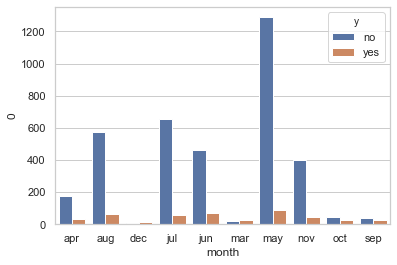

In [151]:
## Q. Write code for the visualization as shown below
c=data.groupby(['month']).y.value_counts().rename().reset_index()
sns.barplot(data=c,x='month',y=0,hue='y')

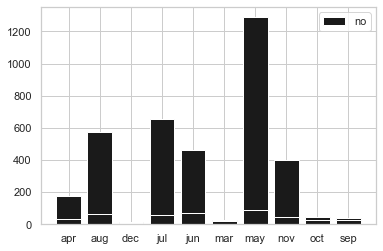

In [158]:
plt.bar(c['month'],c[0],color='k')
plt.legend(c['y'])

Month might be a good predictor of the outcome variable

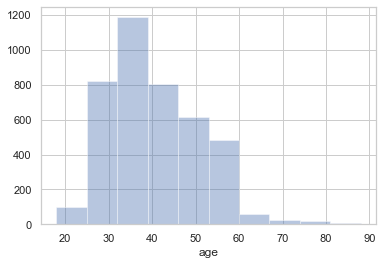

In [92]:
## Q. Write code for the visualization as shown below
sns.distplot(data['age'],kde=False,bins=10)

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [115]:
## Q. Write code for the visualization as shown below
c=data.groupby(['poutcome','y']).y.count().rename().reset_index()


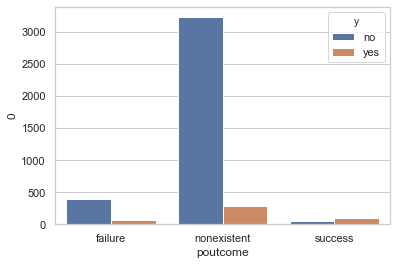

In [81]:
sns.barplot(x='poutcome',y=0,data=c,hue='y')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [458]:
## Write code to convert following columns to equivalent dummy variables

cat_vars=data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]
cat_vars=pd.get_dummies(cat_vars)
cat_vars


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4115,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4116,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4117,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [459]:
data_n=data.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],axis=1)
data_new=pd.concat([data_n,cat_vars],axis=1)
data_new

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [464]:
data_new['y']=data_new['y'].replace('yes',1)
data_new['y']=data_new['y'].replace('no',0)
data_new.groupby('y').y.count()

y
0    3668
1     451
Name: y, dtype: int64

In [469]:
X=data_new.drop(['y'],axis=1)
Y=data['y']

In [473]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
  True False  True False  True  True False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False  True False False  True
  True  True  True  True False  True False False False False False False
  True  True  True]
[29 35 13 41  1  9 22 20  1 34 18  1  1 30  1 36  1  1 25 27  6 43 14 40
 26 46  8 21  7  5 44 37 16 32 38 28 45 15  1  3 10  2 17 11  1 33 19  1
  1  1  1  1 12  1 42 31 23 39 24  4  1  1  1]


The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [476]:
cols=data_new[["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"]]
X=cols
Y=data_new['y']



### Implementing the model

In [480]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.283920
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4101
Method:                           MLE   Df Model:                           17
Date:                Sun, 29 Dec 2019   Pseudo R-squ.:                  0.1781
Time:                        19:09:08   Log-Likelihood:                -1169.5
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 6.619e-97
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.4121      0.142      2.892      0.004       0.133       0.691

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [522]:
## Write code to import Logistic Regression module from SKlearn library and train the X,Y variables on that Logistic Regression object

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
log=LogisticRegression()
log.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [503]:
## Perform predictions on the Test dataset
predict=log.predict(x_test)
metrics.accuracy_score(y_test,predict)

0.8980582524271845

### Cross Validation

In [520]:
## Write down code for a 10 fold cross validation on the given X,Y variables

from sklearn.model_selection import cross_val_score
cross=cross_val_score(log,x_train,y_train,cv=10,n_jobs=-1)
cross.mean()

0.90195889130762

### Confusion Matrix

[[725   7]
 [ 77  15]]


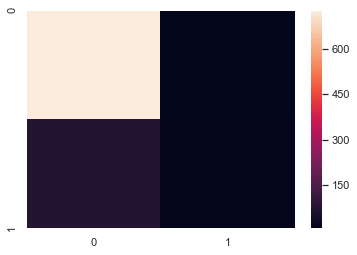

In [499]:
## Create the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predict))
sns.heatmap(metrics.confusion_matrix(y_test,predict))

The result is telling us that we have 725+15 correct predictions and 77+7 incorrect predictions.

#### Accuracy

In [502]:
## Find the accuracy of your model
metrics.accuracy_score(y_test,predict)

0.8980582524271845

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [501]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       732
           1       0.68      0.16      0.26        92

    accuracy                           0.90       824
   macro avg       0.79      0.58      0.60       824
weighted avg       0.88      0.90      0.87       824



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics

Text(0.5, 1.0, 'Logistic Regression Roc Curve')

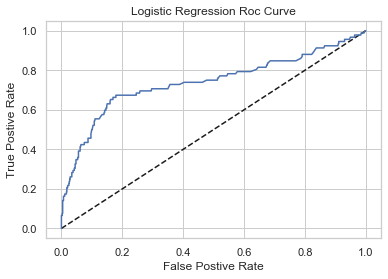

In [516]:
##  ROC curve for your model
from sklearn.metrics import roc_curve
y_pred=log.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Logistic Regression Roc Curve')

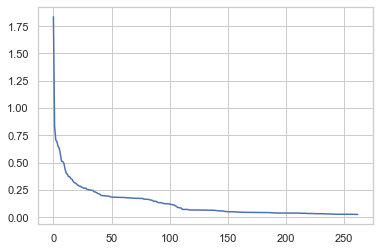

In [517]:
plt.plot(threshold)